<a href="https://colab.research.google.com/github/Atharva-D/Detection-and-Prediction-of-Diabetes/blob/main/FULL_FINAL_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
install.packages("dplyr") 
install.packages("ggplot2") 
install.packages("caret") 
install.packages("e1071") 
install.packages("cowplot") 
install.packages("matrix")
install.packages("magrittr")
install.packages("glmnet", dependencies=TRUE)
install.packages("groupdata2")
install.packages("randomForest")
tar("libraryrf.tar.gz", "/usr/local/lib/R/site-library")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/dplyr_1.0.7.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 852103 bytes (832 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write 

In [4]:
%%R
install.packages("mlbench")
library(mlbench)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/mlbench_2.1-3.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 922103 bytes (900 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[writ

In [5]:
%cp gdrive/MyDrive/libraryrf.tar.gz .

cp: cannot stat 'gdrive/MyDrive/libraryrf.tar.gz': No such file or directory


In [6]:
!tar xf libraryrf.tar.gz

tar: Removing leading `/' from member names


In [7]:
%%R
.libPaths('usr/local/lib/R/site-library/')
install.packages("caTools")

R[write to console]: Installing package into ‘/content/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependency ‘bitops’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/bitops_1.0-7.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 10809 bytes (10 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write

In [8]:
%%R
library(data.table) 
library(ggplot2)  
library(caret)        
library(e1071)      
library(cowplot)    
library(Matrix)
library(magrittr)
library(glmnet)
library(groupdata2)
library(class)
library(randomForest)
library(caTools)


R[write to console]: data.table 1.14.2 using 1 threads (see ?getDTthreads).  Latest news: r-datatable.com

R[write to console]: Loading required package: lattice

R[write to console]: Loaded glmnet 4.1-3

R[write to console]: randomForest 4.6-14

R[write to console]: Type rfNews() to see new features/changes/bug fixes.

R[write to console]: 
Attaching package: ‘randomForest’


R[write to console]: The following object is masked from ‘package:ggplot2’:

    margin




In [25]:
%%R
data("PimaIndiansDiabetes")
data=PimaIndiansDiabetes
str(data)

'data.frame':	768 obs. of  9 variables:
 $ pregnant: num  6 1 8 1 0 5 3 10 2 8 ...
 $ glucose : num  148 85 183 89 137 116 78 115 197 125 ...
 $ pressure: num  72 66 64 66 40 74 50 0 70 96 ...
 $ triceps : num  35 29 0 23 35 0 32 0 45 0 ...
 $ insulin : num  0 0 0 94 168 0 88 0 543 0 ...
 $ mass    : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ pedigree: num  0.627 0.351 0.672 0.167 2.288 ...
 $ age     : num  50 31 32 21 33 30 26 29 53 54 ...
 $ diabetes: Factor w/ 2 levels "neg","pos": 2 1 2 1 2 1 2 1 2 2 ...


In [15]:
%%R
dim(data)

[1] 768   9


In [26]:
%%R
set.seed(123)
data$diabetes=as.factor(data$diabetes)
intrain <- createDataPartition(y = data$diabetes, p= 0.7, list = FALSE)
training <- data[intrain,]
testing <- data[-intrain,]

In [27]:
%%R
dim(training)

[1] 538   9


In [28]:
%%R
dim(testing)

[1] 230   9


In [30]:
%%R
training<-upsample(
  training,
  "diabetes",
  id_col = NULL,
  id_method = "n_ids",
  mark_new_rows = FALSE,
  new_rows_col_name = ".new_row"
)

In [31]:
%%R
dim(training)

[1] 700   9


In [33]:
%%R
table(training$diabetes)


neg pos 
350 350 


In [19]:
%%R
dim(testing)

[1] 230   9


In [34]:
%%R
table(testing$diabetes)


neg pos 
150  80 


In [35]:
%%R
fitControl = trainControl(
  method = 'cv' , 
  number = 10 ,
  savePredictions = 'final' ,
  classProbs = T,
  summaryFunction = twoClassSummary
)

model_svm = caret::train(diabetes ~ . , data=training, method = 'svmRadial' ,metric="ROC", tuneLength = 5, trControl = fitControl) #SVM MODEL



model_svm

Support Vector Machines with Radial Basis Function Kernel 

700 samples
  8 predictor
  2 classes: 'neg', 'pos' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 630, 630, 630, 630, 630, 630, ... 
Resampling results across tuning parameters:

  C     ROC        Sens       Spec     
  0.25  0.8546939  0.7314286  0.8114286
  0.50  0.8630204  0.7457143  0.8200000
  1.00  0.8658776  0.7600000  0.8257143
  2.00  0.8696327  0.7571429  0.8400000
  4.00  0.8678367  0.7771429  0.8428571

Tuning parameter 'sigma' was held constant at a value of 0.1383231
ROC was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.1383231 and C = 2.


In [37]:
%%R
install.packages("pROC")
library(pROC)

R[write to console]: Installing package into ‘/content/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/pROC_1.18.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 688430 bytes (672 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =


In [38]:
%%R
pred_svm <- predict(model_svm, testing)
# Confusion Matrix 
cm_svm <- confusionMatrix(pred_svm, testing$diabetes, positive="pos")
pred_prob_svm <- predict(model_svm, testing, type="prob")
# ROC value
roc_svm <- roc(testing$diabetes, pred_prob_svm$pos)

R[write to console]: Setting levels: control = neg, case = pos

R[write to console]: Setting direction: controls < cases



In [39]:
%%R
cm_svm

Confusion Matrix and Statistics

          Reference
Prediction neg pos
       neg 116  25
       pos  34  55
                                          
               Accuracy : 0.7435          
                 95% CI : (0.6819, 0.7986)
    No Information Rate : 0.6522          
    P-Value [Acc > NIR] : 0.001872        
                                          
                  Kappa : 0.449           
                                          
 Mcnemar's Test P-Value : 0.297638        
                                          
            Sensitivity : 0.6875          
            Specificity : 0.7733          
         Pos Pred Value : 0.6180          
         Neg Pred Value : 0.8227          
             Prevalence : 0.3478          
         Detection Rate : 0.2391          
   Detection Prevalence : 0.3870          
      Balanced Accuracy : 0.7304          
                                          
       'Positive' Class : pos             
                              

In [40]:
%%R
roc_svm


Call:
roc.default(response = testing$diabetes, predictor = pred_prob_svm$pos)

Data: pred_prob_svm$pos in 150 controls (testing$diabetes neg) < 80 cases (testing$diabetes pos).
Area under the curve: 0.8031


                 [,1]
neg vs. pos 0.8030833


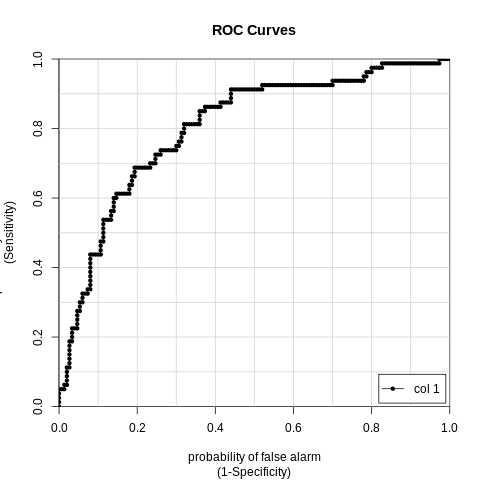

In [41]:
%%R
caTools::colAUC(pred_prob_svm$pos, testing$diabetes, plotROC = T)

In [42]:
%%R
grid_radial <- expand.grid(sigma = c(0,0.01, 0.02, 0.025, 0.03, 0.04,
                                     0.05, 0.06, 0.07,0.08, 0.09, 0.1, 0.25, 0.5, 0.75,0.9),
                           C = c(0,0.01, 0.05, 0.1, 0.25, 0.5, 0.75,
                                 1, 1.5, 2,5))

In [44]:
%%R
set.seed(3233)
svm_Radial_Grid <- train(diabetes ~., data = training, method = "svmRadial",
                         trControl=fitControl,
                         metric="ROC",
                         preProcess = c("center", "scale"),
                         tuneGrid = grid_radial,
                         tuneLength = 10)

svm_Radial_Grid

Support Vector Machines with Radial Basis Function Kernel 

700 samples
  8 predictor
  2 classes: 'neg', 'pos' 

Pre-processing: centered (8), scaled (8) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 630, 630, 630, 630, 630, 630, ... 
Resampling results across tuning parameters:

  sigma  C     ROC        Sens       Spec     
  0.000  0.00        NaN        NaN        NaN
  0.000  0.01  0.5000000  1.0000000  0.0000000
  0.000  0.05  0.5000000  1.0000000  0.0000000
  0.000  0.10  0.5000000  1.0000000  0.0000000
  0.000  0.25  0.5000000  1.0000000  0.0000000
  0.000  0.50  0.5000000  1.0000000  0.0000000
  0.000  0.75  0.5000000  1.0000000  0.0000000
  0.000  1.00  0.5000000  1.0000000  0.0000000
  0.000  1.50  0.5000000  1.0000000  0.0000000
  0.000  2.00  0.5000000  1.0000000  0.0000000
  0.000  5.00  0.5000000  1.0000000  0.0000000
  0.010  0.00        NaN        NaN        NaN
  0.010  0.01  0.8084082  0.7371429  0.7314286
  0.010  0.05  0.8088980  0.7828571  0.67

R[write to console]: Setting levels: control = neg, case = pos

R[write to console]: Setting direction: controls < cases



               [,1]
neg vs. pos 0.73175


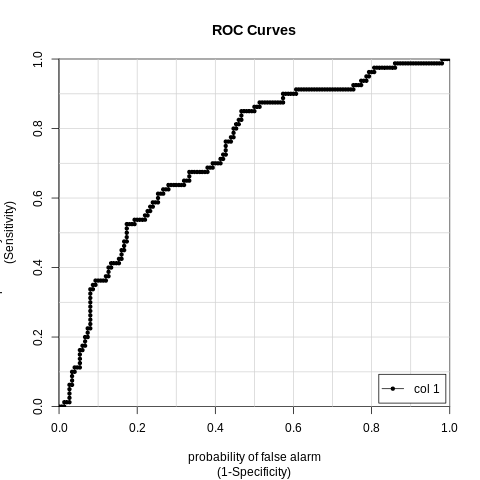

In [45]:
%%R
test_pred_Radial_Grid <- predict(svm_Radial_Grid, newdata = testing)
confusionMatrix(test_pred_Radial_Grid, testing$diabetes)

pred_svm <- predict(svm_Radial_Grid, testing)
# Confusion Matrix 
cm_svm <- confusionMatrix(pred_svm, testing$diabetes, positive="pos")
pred_prob_svm <- predict(svm_Radial_Grid, testing, type="prob")
# ROC value
roc_svm <- roc(testing$diabetes, pred_prob_svm$pos)


In [46]:
%%R
cm_svm


Confusion Matrix and Statistics

          Reference
Prediction neg pos
       neg 137  53
       pos  13  27
                                          
               Accuracy : 0.713           
                 95% CI : (0.6499, 0.7706)
    No Information Rate : 0.6522          
    P-Value [Acc > NIR] : 0.02944         
                                          
                  Kappa : 0.284           
                                          
 Mcnemar's Test P-Value : 1.582e-06       
                                          
            Sensitivity : 0.3375          
            Specificity : 0.9133          
         Pos Pred Value : 0.6750          
         Neg Pred Value : 0.7211          
             Prevalence : 0.3478          
         Detection Rate : 0.1174          
   Detection Prevalence : 0.1739          
      Balanced Accuracy : 0.6254          
                                          
       'Positive' Class : pos             
                              

In [47]:
%%R
roc_svm



Call:
roc.default(response = testing$diabetes, predictor = pred_prob_svm$pos)

Data: pred_prob_svm$pos in 150 controls (testing$diabetes neg) < 80 cases (testing$diabetes pos).
Area under the curve: 0.7318


               [,1]
neg vs. pos 0.73175


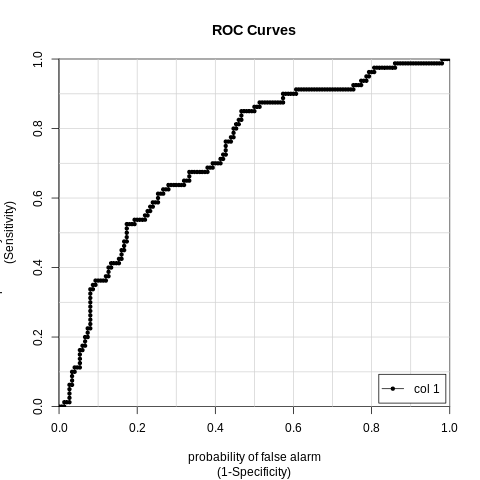

In [48]:
%%R
caTools::colAUC(pred_prob_svm$pos, testing$diabetes, plotROC = T)